In [52]:
pip install --upgrade tensorflow keras


Note: you may need to restart the kernel to use updated packages.


In [53]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Open the file 
with open('Artifacts/preprocessed_data.pkl', 'rb') as file:
    # Load the preprocessed training data 
    x_train = pickle.load(file)
    y_train = pickle.load(file)
    
    # Load the preprocessed validation data
    x_val = pickle.load(file)
    y_val = pickle.load(file)
    
    # Load the preprocessed test data
    x_test = pickle.load(file)
    y_test = pickle.load(file)

from tensorflow.keras.models import model_from_json
# Load the model architecture from the JSON file
with open("models/cnn_hypertuned_dropout.json", "r") as json_file:
    model_json = json_file.read()

# Reconstruct the model
model_skeleton = model_from_json(model_json)


In [54]:
from tensorflow.keras.optimizers import Adam

# Compile the model
optimizer = Adam(
    learning_rate=0.00018328792004345589,
    beta_1=0.9700000000000001,
    beta_2=0.9540000000000001,
    epsilon=3.3137745378583986e-07
)

model_skeleton.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
def k_fold_cross_validation(model_fn, x_data, y_data, k=5, epochs=10):
    kfold = KFold(n_splits=k, shuffle=True, random_state=42)
    fold_no = 1
    accuracies = []
    histories = []

    for train_index, val_index in kfold.split(x_data):
        print(f"Training fold {fold_no}...")

        # Split the data into training and validation sets
        x_train, x_val = x_data[train_index], x_data[val_index]
        y_train, y_val = y_data[train_index], y_data[val_index]

        # Build the model
        model = model_fn()
        
        # Train the model
        history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_val, y_val))
        histories.append(history)

        # Evaluate the model on the validation set
        val_loss, val_accuracy = model.evaluate(x_val, y_val, verbose=0)
        accuracies.append(val_accuracy)
        
        print(f"Fold {fold_no} - Validation Accuracy: {val_accuracy}")
        fold_no += 1

    # Calculate the average accuracy across all folds
    avg_accuracy = np.mean(accuracies)
    print(f"\nAverage Validation Accuracy across {k} folds: {avg_accuracy}")
    
    # Visualization
    plot_accuracies_per_fold(accuracies)
    plot_loss_per_epoch(histories)
    plot_combined_accuracy_per_fold(histories)

    return avg_accuracy
    

In [56]:
def plot_accuracies_per_fold(accuracies):
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(accuracies) + 1), accuracies, color='skyblue')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.title('Validation Accuracy per Fold')
    plt.show()

In [57]:
def plot_loss_per_epoch(histories):
    plt.figure(figsize=(12, 8))

    for i, history in enumerate(histories):
        plt.plot(history.history['val_loss'], label=f'Fold {i+1} Validation Loss')
    
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Validation Loss per Epoch for Each Fold')
    plt.legend()
    plt.show()


In [58]:
def plot_combined_accuracy_per_fold(histories):
    plt.figure(figsize=(12, 8))

    for i, history in enumerate(histories):
        plt.plot(history.history['accuracy'], label=f'Fold {i+1} Training Accuracy')
        plt.plot(history.history['val_accuracy'], label=f'Fold {i+1} Validation Accuracy', linestyle='--')
    
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy per Epoch for Each Fold')
    plt.legend()
    plt.show()

Training fold 1...
Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 853ms/step - accuracy: 0.2234 - loss: 2.5622 - val_accuracy: 0.2653 - val_loss: 1.3981
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 835ms/step - accuracy: 0.1696 - loss: 1.6032 - val_accuracy: 0.3673 - val_loss: 1.3822
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1000ms/step - accuracy: 0.2586 - loss: 1.3807 - val_accuracy: 0.2041 - val_loss: 1.3842
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 985ms/step - accuracy: 0.3047 - loss: 1.3738 - val_accuracy: 0.2653 - val_loss: 1.3720
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 967ms/step - accuracy: 0.4136 - loss: 1.3487 - val_accuracy: 0.3878 - val_loss: 1.3378
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 967ms/step - accuracy: 0.4593 - loss: 1.2737 - val_accuracy: 0.3878 - val_loss: 1.2842
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 968ms/step - accuracy: 0.5713 - loss: 1.1842 - val_accuracy: 0.5714 - val_loss: 1.2142
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 935ms/step - accuracy: 0.6233 - loss: 1.0690 - val_accuracy

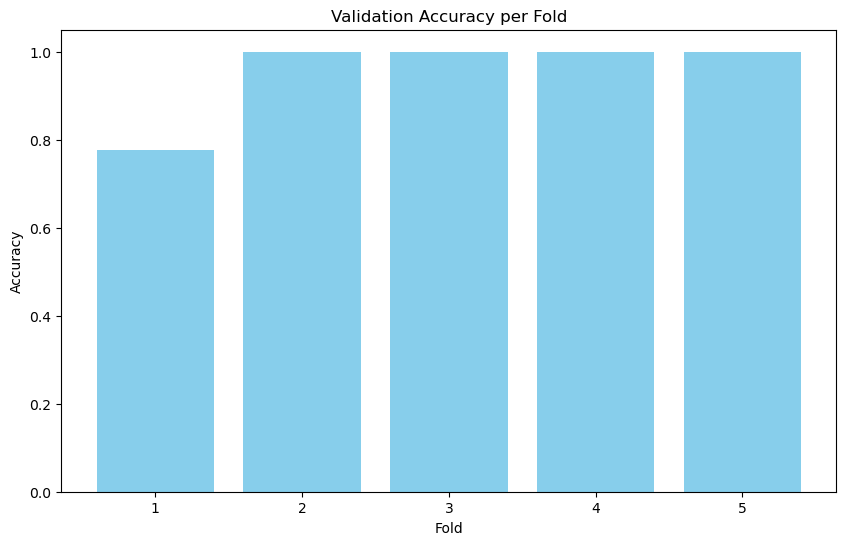

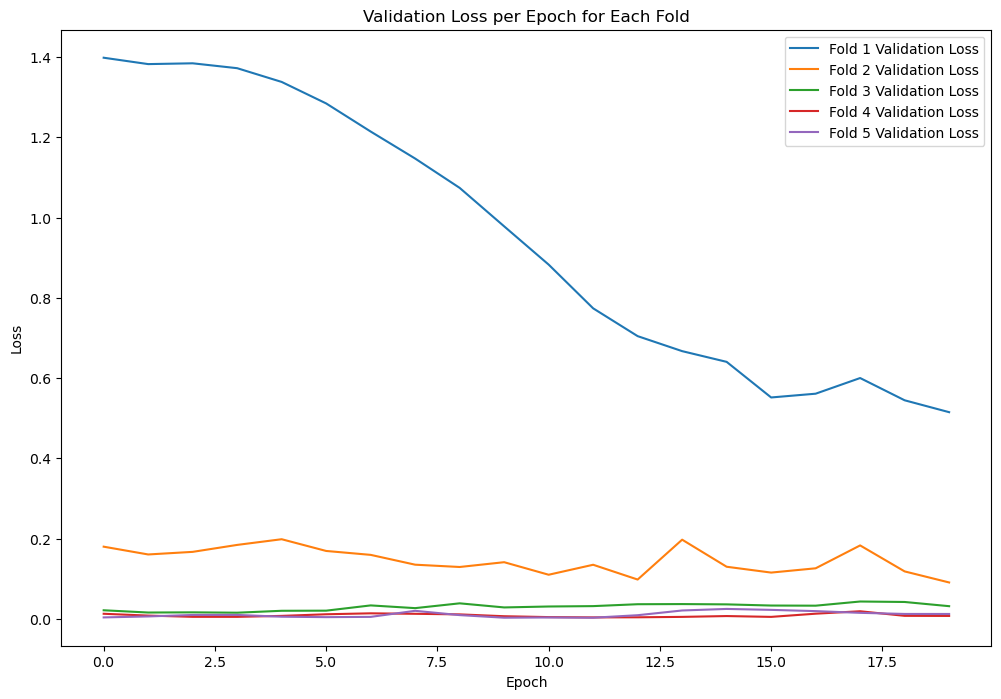

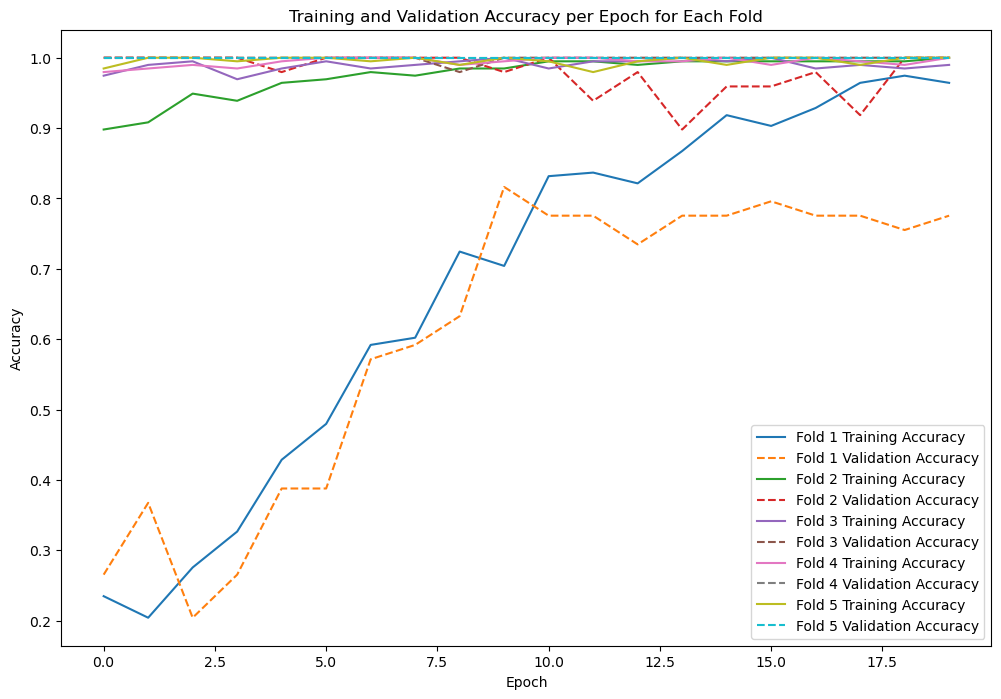

0.9551020383834838

In [59]:
def model_2():
    return model_skeleton  # Assuming `model_skeleton` is your second model defined earlier

k_fold_cross_validation(model_2, x_train, y_train, k=5, epochs=20)

From baseline model part, the model initially had an accuracy of 100% but validation accuracy was only about 70%. Though the model appeared to be performing well. Tt was performing well on the training data while not much on the training data. The F1 score of 0.63 looks good though.

Upon improving the model from Hyperparameter tuning part, model 2 is the best model with accuracy to be 81.8%, the validation accuracy has improved a lot.

The model exhibited strong performance across all folds, with validation accuracy ranging from 77.55% to 100%.Fold 1 showed a slightly lower validation accuracy compared to the other folds, which might suggest some variability in the data or model's sensitivity to certain data subsets.Folds 2 and 3 demonstrated perfect or near-perfect performance, indicating that the model is highly effective for the given task.

Overfitting Concerns: The significant difference between the training and validation accuracies in Fold 1, compared to Folds 2 and 3, suggests that the model may be slightly overfitting in some cases. However, the overall generalization appears strong.
Model Stability: The consistent performance across folds 2 and 3 indicates that the model is stable and robust for the given classification task.
Need for Further Validation: While the cross-validation results are promising, further testing on unseen data or additional folds might be necessary to confirm the model's generalization capabilities.